In [1]:
import os, time, subprocess, sys

sys.path.append("..")
from main import Formula, WalkSat

import matplotlib.pyplot as plt

from IPython.display import clear_output


In [27]:
# OPCIONS EXPERIMENT
MAX_CLAUSES = 100
STEP = 10

OCURRENCES = 10


# TODO fer que es pugi passar per parametre aquestes opcions
max_tries = 1000
max_flips = 1000
w = 0.8

In [28]:
%rm -rf ./experiment
%mkdir experiment

# Generate the experiments
for n in range(10, MAX_CLAUSES, STEP):
    clear_output()
    print(n)
    os.system("mkdir ./experiment/%i" % n)
    for i in range(1, OCURRENCES):
        #                       <num-vars> <num-clauses> <clause-length>
        os.popen(
            "python3 ./rnd-cnf-gen.py 50 %i 3 %i > ./experiment/%i/%i.cnf" % (n, i, n, i))
    



90


In [29]:
res = os.listdir("experiment")
casted = [int(elem) for elem in res]
casted.sort()
experiments = casted
x_axis = experiments
x_axis


[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [30]:
y_axis = []

for exp in experiments:
    problems = os.listdir("./experiment/%s" % exp)
    clear_output()
    print(exp)
    
    sum = 0
    count = 0
    for problem in problems:
        start = time.time()
        subprocess.call("python3 ../main.py ./experiment/%s/%s" %
                        (exp, problem), shell=True)
        end = time.time()
        sum += end-start
        count += 1
    y_axis.append(sum/count)

clear_output()
y_axis


[0.0258633295694987,
 0.047284073299831815,
 0.22895500395033094,
 0.8959655496809218,
 2.4660023053487143,
 3.598635117212931,
 5.240264097849528,
 6.69359114434984,
 7.435612890455458]

Text(0, 0.5, 'Seconds')

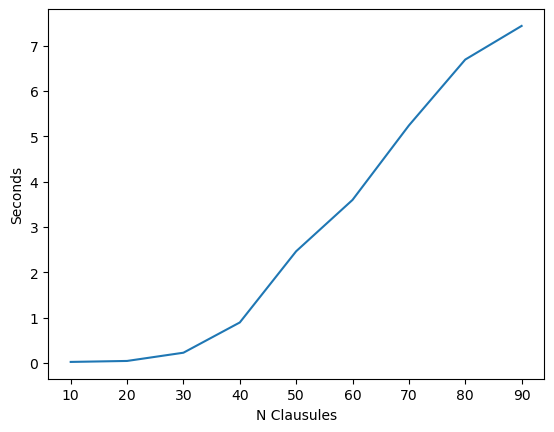

In [31]:
plt.plot(x_axis, y_axis)
plt.xlabel("N Clausules")
plt.ylabel("Seconds")